Largest % difference between max and min random values: 0.27%
Largest % difference between max and min dd values: 0.04%


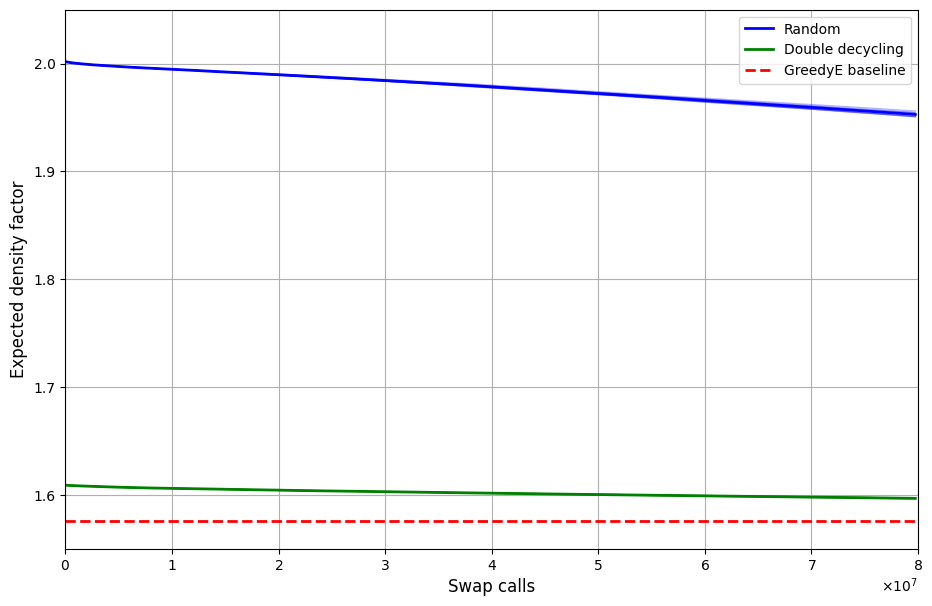

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt



from matplotlib.ticker import ScalarFormatter

def fix_offset_text(ax):
    import re
    offset_text_obj = ax.xaxis.get_offset_text()
    offset_text = offset_text_obj.get_text()
    
    # Match scientific notation like 1e7 or ×1e+07
    match = re.search(r'e([+-]?\d+)', offset_text)
    if match:
        exp = match.group(1)
        superscript = exp.translate(str.maketrans("0123456789-", "⁰¹²³⁴⁵⁶⁷⁸⁹⁻"))
        offset_text_obj.set_text(f"×10{superscript}")



# Constants
w, k = 15, 15
gc_count_gm = 105765708
normalization_factor = 2 ** (w + k)

# Normalize the GM value
gm_constant_value = (gc_count_gm / normalization_factor) * (w + 1)

# Get files containing 'random' and 'dd'
files_random = [f for f in os.listdir('.') if 'random' in f]
files_dd = [f for f in os.listdir('.') if 'dd' in f]

def read_gc_counts(files):
    """Reads GC counts from multiple files and returns as a list of lists (normalized)."""
    data = []
    for file in files:
        with open(os.path.join('.', file), 'r') as f:
            counts = [int(line.strip()) / normalization_factor for line in f.readlines()]
            counts = [(w + 1) * x for x in counts]
            data.append(counts)
    return data

# Read and normalize data
data_random = read_gc_counts(files_random)
data_dd = read_gc_counts(files_dd)

# Ensure equal lengths by truncation
min_length = min(min(map(len, data_random)), min(map(len, data_dd)))
data_random = np.array([arr[:min_length] for arr in data_random])
data_dd = np.array([arr[:min_length] for arr in data_dd])

# Compute averages
mean_random = np.mean(data_random, axis=0)
mean_dd = np.mean(data_dd, axis=0)

# Compute steps
steps = np.arange(0, min_length * 1000, 1000)  # Each step represents 1000 tries

# Compute the largest percentage difference between max and min at any step (for random)
max_random = np.max(data_random, axis=0)
min_random = np.min(data_random, axis=0)
largest_percentage_diff = np.max(((max_random - min_random) / min_random) * 100)
print(f"Largest % difference between max and min random values: {largest_percentage_diff:.2f}%")

max_dd = np.max(data_dd, axis=0)
min_dd = np.min(data_dd, axis=0)
largest_percentage_diff_dd = np.max(((max_dd - min_dd) / min_dd) * 100)
print(f"Largest % difference between max and min dd values: {largest_percentage_diff_dd:.2f}%")

# Plot results
plt.figure(figsize=(11, 7))

# Plot each random run separately
for i in range(len(data_random)):
    plt.plot(steps, data_random[i], color='blue', alpha=0.3, linewidth=1)

# Plot each dd run separately
for i in range(len(data_dd)):
    plt.plot(steps, data_dd[i], color='green', alpha=0.3, linewidth=1)

# Plot means
plt.plot(steps, mean_random, color='blue', linestyle='-', linewidth=2, label="Random")
plt.plot(steps, mean_dd, color='green', linestyle='-', linewidth=2, label="Double decycling")

# Plot GM as a constant horizontal line
plt.axhline(y=gm_constant_value, color='red', linestyle='--', linewidth=2, label='GreedyE baseline')

# from 1.55 to 2.05
plt.ylim(1.55, 2.05)
plt.xlim(0,8*(10**7))
# Labels and formatting
plt.xlabel("Swap calls", fontsize=12)
plt.ylabel("Expected density factor", fontsize=12)
plt.legend()
plt.grid(True)

ax = plt.gca()
ax.ticklabel_format(axis='x', style='scientific')
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))

plt.draw()  # Ensure offset text is generated
fix_offset_text(ax)

plt.draw()  # Important: force matplotlib to generate offset text
fix_offset_text(ax)
plt.savefig("gc_count_comparison.pdf")
plt.show()


In [8]:
# print the normalized gc count for last step for random (averaged), and GM 
print(f"Random (averaged) last step: {mean_random[-1]:.5f}")
print(f"GM constant value: {gm_constant_value:.5f}")


# print first and last density of random and dd
print(f"Random (averaged) first step: {mean_random[0]:.5f}")
print(f"Random (averaged) last step: {mean_random[-1]:.5f}")
print(f"DD (averaged) first step: {mean_dd[0]:.5f}")
print(f"DD (averaged) last step: {mean_dd[-1]:.5f}")

Random (averaged) last step: 1.95283
GM constant value: 1.57603
Random (averaged) first step: 2.00198
Random (averaged) last step: 1.95283
DD (averaged) first step: 1.60891
DD (averaged) last step: 1.59673
